In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('data1.csv')
data.head()

,X1,X2,X3,X4,X5,X6,Target
0,75.0,1,1.0,1,5,170.0,6.00
1,75.0,3,3.0,1,5,170.0,10.60
2,45.0,1,1.0,1,5,370.0,0.50
3,75.0,1,1.0,35,5,370.0,11.38
4,75.0,1,3.0,1,1,370.0,8.50


In [8]:
data.shape

(87, 7)

In [9]:
data.describe()

,X1,X2,X3,X4,X5,X6,Target
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,61.349729,2.022989,2.021016,18.839080,3.022989,269.917847,7.106322
std,14.251277,0.927324,0.921081,15.620405,1.791303,95.356144,5.794087
min,30.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.010000
25%,45.000000,1.000000,1.000000,1.000000,1.000000,170.000000,1.740000
50%,65.000000,2.000000,2.000000,20.000000,3.000000,270.000000,7.300000
75%,75.000000,3.000000,3.000000,35.000000,5.000000,370.000000,10.050000
max,102.426407,5.000000,4.828427,65.000000,7.000000,532.842712,26.300000


In [10]:
X1 = data[['X1','X2','X3','X4','X5','X6']]
X1 = np.array(X1)

X1 = np.log(X1)

y1 = data['Target']
y1 = np.log(y1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15, random_state=42)


y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)

(73, 6)
(14, 6)


# Perceptron

In [12]:
def forward_prop(X,y,w):
        
    y_hat = np.dot(w,X)
    
    
    L = (y_hat-y)**2
    
    dL = 2*(y_hat-y)
    
    dict = {
        'dL' : dL,
        'y_hat' : y_hat,
        'loss' : L
    }
    
    return dict

    

In [13]:
def back_prop(X,w,dict):
    #X[0]=P1,X[1]=P2,X[2]=P3,X[3]=P4,X[4]=P5,X[5]=P6
    
    z = dict['dL']
    
    da = z * X[0]
    db = z * X[1]
    dc = z * X[2]
    dd = z * X[3]
    de = z * X[4]
    df = z * X[5]
    
    dict_d = {
        'da':da,
        'db':db,
        'dc':dc,
        'dd':dd,
        'de':de,
        'df':df

    }
      
    return dict_d    

In [14]:
#test purpose
W =np.ones(6)*0.1

dict = forward_prop(X_train[0], y_train[0],W)
print(dict)

print(back_prop(X_train[0],W,dict))

{'dL': -2.2621431817054667, 'y_hat': 1.7593001670434312, 'loss': 1.2793229436341331}
{'da': -9.766776298130562, 'db': -2.4852182981484026, 'dc': -2.4852182981484026, 'dd': -8.042706375888026, 'de': -3.64077899999108, 'df': -13.377190504199396}


In [15]:
W = np.random.normal(loc=1, scale=1, size=6) 
#weight initialization(gaussian) with mean=1 and std = 1
epoch = 5000
learning_rate = 0.001
loss_sgd_tr = []
loss_sgd_te = []
epochs = []


for i in range (epoch):
    #for each epoch
    loss = 0
    loss1 = 0
    for j in range(len(X_train)):
      #for each data point in dataset
        forward = forward_prop(X_train[j],y_train[j],W)
        #forward pass and get loss
        loss += forward['loss']
      
      #back pass
        backward = back_prop(X_train[j],W,forward)
        #getting gradient matrix
        dw = list(backward.values())
        #weight update
        W = W - (learning_rate * np.array(dw))
    
    for k in range(len(X_test)):
        forward = forward_prop(X_test[k],y_test[k],W)
        loss1 += forward['loss']

    loss_sgd_tr.append(loss/len(X_train))
    loss_sgd_te.append(loss/len(X_test))
    epochs.append(i)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_sgd_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_sgd_te[-1]))


Train loss at the end of 5000 epoch is : 1.9211520591803646
Test loss at the end of 5000 epoch is : 10.017435737154758


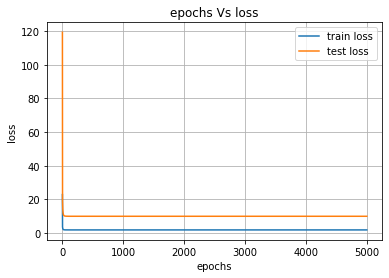

In [16]:
plt.plot(epochs,loss_sgd_tr,label = 'train loss')
plt.plot(epochs,loss_sgd_te,label = 'test loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()

In [17]:
W

array([ 0.62987159, -0.14663387,  0.32099864,  0.0463321 ,  0.40955925,
       -0.30065567])

# Momentum

In [18]:
W = np.random.normal(loc=0.1, scale=0.1, size=6) 
#W and vdw initialization with same size
vdw = np.zeros(6)
epoch = 5000
learning_rate = 0.001
loss_momt_tr = []
loss_momt_te = []
epochs = []
beta = 0.5


for i in range (epoch):

    loss = 0
    loss1 = 0
    for j in range(len(X_train)):
      #forward pass:
        forward = forward_prop(X_train[j],y_train[j],W)
        loss += forward['loss']
    
        #back pass:
        backward = back_prop(X_train[j],W,forward)
        dw = list(backward.values())
        vdw = (beta * vdw) + ((1-beta)*np.array(dw))
        W = W - (learning_rate *vdw)
        
    for k in range(len(X_test)):
        forward = forward_prop(X_test[k],y_test[k],W)
        loss1 += forward['loss']

    loss_momt_tr.append(loss/len(X_train))
    loss_momt_te.append(loss/len(X_test))
    epochs.append(i)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_momt_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_momt_te[-1]))


Train loss at the end of 5000 epoch is : 1.9375140436752143
Test loss at the end of 5000 epoch is : 10.102751799163617


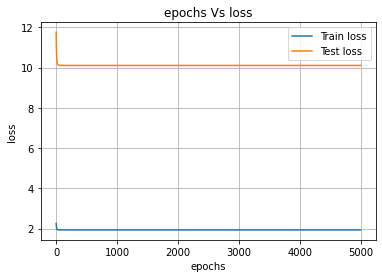

In [19]:
plt.plot(epochs,loss_momt_tr,label = 'Train loss')
plt.plot(epochs,loss_momt_te,label = 'Test loss')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()


In [20]:
W

array([ 0.62301614, -0.16297852,  0.32600203,  0.03942831,  0.39786653,
       -0.31072881])

In [21]:
np.save('W_momt.npy', W)

## adam

In [22]:
W = np.random.normal(loc=0.1, scale=0.1, size=6) 
vdw = np.zeros(6)
sdw = np.zeros(6)
epoch = 500
learning_rate = 0.0001
epochs = []
beta1 = 0.9
beta2 = 0.99
eps = 0.000001

loss_adam_tr = []
loss_adam_te = []

for i in range (epoch):
  loss = 0
  loss1 = 0
  
  for j in range (len(X_train)):

    forward = forward_prop(X_train[j],y_train[j],W)
    loss = forward['loss']
    backward = back_prop(X_train[j],W,forward)
    
    dw = list(backward.values())
    vdw = (beta1 * vdw) + ((1-beta1) * np.array(dw))
    sdw = (beta2 * sdw) + ((1-beta2)* np.array(dw)**2)
   
    v_hat = vdw / (1-beta1**(j+1))
    s_hat = sdw / (1-beta2**(j+1))
 
    W = W - ((learning_rate* v_hat)/((s_hat)**0.5 + eps))

    for k in range(len(X_test)):
      forward = forward_prop(X_test[k],y_test[k],W)
      loss1 += forward['loss']
    
    
  loss_adam_tr.append(loss/len(X_train))
  loss_adam_te.append(loss1/len(X_test))
  epochs.append(i)
  #print(loss_adam)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_adam_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_adam_te[-1]))




Train loss at the end of 500 epoch is : 0.020839171873052585
Test loss at the end of 500 epoch is : 159.06649279022227


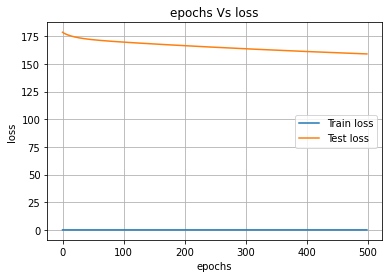

In [23]:
plt.plot(epochs,loss_adam_tr,label = 'Train loss')
plt.plot(epochs,loss_adam_te,label = 'Test loss')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()


# MLP

In [24]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation

    return (1/(1+np.exp(-z)))

def forward_prop1(X,y,W1,W2):
    
    
    z11,z12,z13 = np.dot(np.transpose(W1),X.reshape(-1,1))
    
    o11 = sigmoid(z11)
    o12 = sigmoid(z12)
    o13 = sigmoid(z13)
    
    
    y_hat = o11*W2[0] + o12*W2[1] + o13*W2[2]
    
    L = (y-y_hat)**2
    
    dL = -2*(y-y_hat)
    
    dict = {
        'dL' : dL,
        'y_hat' : y_hat,
        'loss' : L,
        'o11' : o11,
        'o12' : o12,
        'o13' : o13
    }
    
    return dict

In [25]:
def back_prop1(X,W1,W2,dict):
    
    w1 = []
    w2 = []
    w3 = []
    
    dW112 = dict['dL'] * dict['o11']
    dW212 = dict['dL'] * dict['o12']
    dW312 = dict['dL'] * dict['o13']
    
    a = dict['dL'] * W2[0] * dict['o11'] * (1 - dict['o11'])
    b = dict['dL'] * W2[1] * dict['o12'] * (1 - dict['o12'])
    c = dict['dL'] * W2[2] * dict['o13'] * (1 - dict['o13'])

        
    for i in range(len(X)):
        w1.append(a[0] * X[i])
        w2.append(b[0] * X[i])
        w3.append(c[0] * X[i])
        
    w1 = np.array(w1).reshape(-1,1)
    w2 = np.array(w2).reshape(-1,1)
    w3 = np.array(w3).reshape(-1,1)
    
    w11= np.hstack((w1,w2,w3))
    
    w22 = np.array([dW112,dW212,dW312]).reshape(-1,1)
    
    return w11 , w22
    
    

In [26]:
W1 = np.random.normal(0.1,0.2, size=(6,3))
W2 = np.random.normal(0.1,0.2, size=(3,1))
epoch = 2500
learning_rate = 0.001
loss_sgd_tr = []
loss_sgd_te = []
epochs = []


for i in range (epoch):

    loss = 0
    loss1 = 0
    for j in range (len(X_train)):
        #forward pass:
        forward = forward_prop1(X_train[j],y_train[j],W1,W2)
        loss += forward['loss']
    
        #back pass:
        w11 , w22 = back_prop1(X_train[j],W1,W2,forward)
        #weight updates
        W1 = W1 - (learning_rate * w11)
        W2 = W2 - (learning_rate * w22)
  
    for k in range(len(X_test)):
        forward = forward_prop1(X_test[k],y_test[k],W1,W2)
        loss1 += forward['loss']
        
    loss_sgd_tr.append(loss/len(X_train))
    loss_sgd_te.append(loss1/len(X_test))
    epochs.append(i)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_sgd_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_sgd_te[-1]))


Train loss at the end of 2500 epoch is : [0.65635538]
Test loss at the end of 2500 epoch is : [0.54879726]


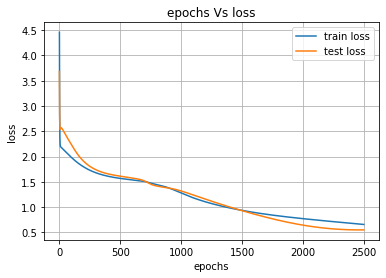

In [27]:
plt.plot(epochs,loss_sgd_tr,label = 'train loss')
plt.plot(epochs,loss_sgd_te,label = 'test loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()

In [28]:
W1 

array([[ 4.78906382,  1.27066304,  3.31319993],
       [-0.14523999,  0.06801423,  0.19792715],
       [ 1.13420902,  0.27340901,  0.50167484],
       [-5.04951595,  0.40750495,  0.58091036],
       [ 2.65520675,  0.16314508, -0.39563986],
       [-0.24025284,  0.57608081, -2.49867723]])

In [29]:
W2

array([[ 5.67318126],
       [-5.89288347],
       [ 2.87373554]])

In [30]:
np.save('W1.npy', W1)
np.save('W2.npy', W2)
np.save('W.npy', W)

# Momentum


In [37]:
W1 = np.random.normal(0.1,0.2, size=(6,3))
W2 = np.random.normal(0.1,0.2, size=(3,1))
epoch = 2500
learning_rate = 0.001
loss_momt_tr = []
loss_momt_te = []
epochs = []
vdw1 = np.zeros((6,3))
vdw2 = np.zeros((3,1))
epochs = []
beta = 0.5
for i in range (epoch):
  loss = 0 
  loss1 = 0
  for j in range (len(X_train)):
    #forward pass
    forward = forward_prop1(X_train[j],y_train[j],W1,W2)
    loss += forward['loss']
    #back pass:
    w11 , w22 = back_prop1(X_train[j],W1,W2,forward)    
    vdw1 = (beta * vdw1) + ((1-beta)*w11)
    vdw2 = (beta * vdw2) + ((1-beta)*w22)
    W1 = W1 - (learning_rate *vdw1)
    W2 = W2 - (learning_rate *vdw2)
    
  for k in range(len(X_test)):
      forward = forward_prop1(X_test[k],y_test[k],W1,W2)
      loss1 += forward['loss']
        
  loss_momt_tr.append(loss/len(X_train))
  loss_momt_te.append(loss1/len(X_test))
  epochs.append(i)

print('Train loss at the end of {} epoch is : {}'.format(epoch,loss_momt_tr[-1]))
print('Test loss at the end of {} epoch is : {}'.format(epoch,loss_momt_te[-1]))


Train loss at the end of 2500 epoch is : [0.59923968]
Test loss at the end of 2500 epoch is : [0.56766953]


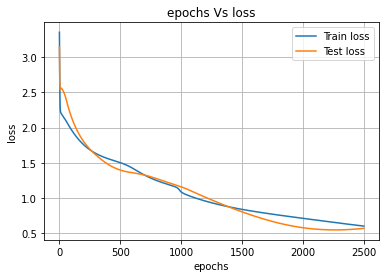

In [39]:
plt.plot(epochs,loss_momt_tr,label = 'Train loss')
plt.plot(epochs,loss_momt_te,label = 'Test loss')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()


In [40]:
W1

array([[ 1.24313821,  3.18910818,  5.09346778],
       [ 0.23586403,  0.21789591, -0.05398191],
       [ 0.03946089,  0.46063461,  1.18548081],
       [ 0.53948762,  0.5515246 , -5.6309725 ],
       [ 0.04471249, -0.44103729,  3.12168741],
       [ 0.63738501, -2.38462767, -0.09025726]])

In [41]:
W2

array([[-6.38795949],
       [ 2.99226184],
       [ 6.05917219]])

In [42]:
np.save('W1_momt.npy', W1)
np.save('W2_momt.npy', W2)


# Adam

In [43]:
W1 = np.random.normal(0.1,0.2, size=(6,3))
W2 = np.random.normal(0.1,0.2, size=(3,1)) 
vdw1 = np.zeros((6,3))
vdw2 = np.zeros((3,1))
sdw1 = np.zeros((6,3))
sdw2 = np.zeros((3,1))
epoch = 500
learning_rate = 0.0001
weights = []

epochs = []
beta1 = 0.8
beta2 = 0.99
eps = 0.000001
#print(W)
#for k in range (len(X)):
  #forward = forward_propagation(X[k],y[k],W)
  #loss = forward['loss']

#print('initial loss',loss)
loss_adam_tr = []
loss_adam_te = []

for i in range (epoch):
  #print('epoch {}'.format(i+1))
  for j in range (len(X_train)):
    #forward pass:
    forward = forward_prop1(X_train[j],y_train[j],W1,W2)
    loss = forward['loss']
    #back pass
    w11 , w22 = back_prop1(X_train[j],W1,W2,forward )
    vdw1 = (beta1 * vdw1) + ((1-beta1) * np.array(w11))
    vdw2 = (beta1 * vdw2) + ((1-beta1) * np.array(w22))
    sdw1 = (beta2 * sdw1) + ((1-beta2)* np.array(w11)**2)
    sdw2 = (beta2 * sdw2) + ((1-beta2)* np.array(w22)**2)
    v_hat1 = vdw1 / (1-beta1**(j+1))
    v_hat2 = vdw2 / (1-beta1**(j+1))
    s_hat1 = sdw1 / (1-beta2**(j+1))
    s_hat2 = sdw2 / (1-beta2**(j+1))

    W1 = W1 - ((learning_rate* v_hat1)/((s_hat1)**0.5 + eps))
    W2 = W2 - ((learning_rate* v_hat2)/((s_hat2)**0.5 + eps))
  for k in range(len(X_test)):
    forward = forward_prop1(X_test[k],y_test[k],W1,W2)
    loss1 += forward['loss']   
   
  loss_adam_tr.append(loss/len(X_train))
  loss_adam_te.append(loss/len(X_test))
  epochs.append(i)


print('loss at the end of {} epoch is : {}'.format(epoch,loss_adam_tr[-1]))
print('loss at the end of {} epoch is : {}'.format(epoch,loss_adam_te[-1]))



loss at the end of 500 epoch is : [0.02468309]
loss at the end of 500 epoch is : [0.12870468]


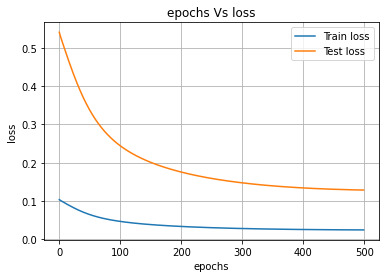

In [44]:
plt.plot(epochs,loss_adam_tr,label = 'Train loss')
plt.plot(epochs,loss_adam_te,label = 'Test loss')

plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("epochs Vs loss")
plt.grid()
plt.show()


In [45]:
np.save('W1_adam.npy', W1)
np.save('W2_adam.npy', W2)
np.save('W_adam.npy', W)

# Deploy Model

In [46]:

!pip install streamlit


!pip install pyngrok

     |████████████████████████████████| 8.2MB 6.3MB/s 
     |████████████████████████████████| 4.6MB 52.5MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 112kB 62.2MB/s 
     |████████████████████████████████| 163kB 40.8MB/s 
     |████████████████████████████████| 122kB 48.7MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=80a4d25930aeb50c1f763c57cb43f9ab9e878904dc3c35ae065276d87eff5898
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 8.3MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=d16765fb8c8113caf3a5ae658f424d507c91801222dd9073252876caac82b764
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [53]:

%%writefile app.py 

import numpy as np
import streamlit as st

W1 = np.load('/content/W1_momt.npy')
W2 = np.load('/content/W2_momt.npy')
W3 =  np.load('/content/W_momt.npy')



def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation

    return (1/(1+np.exp(-z)))

def predict_flux(X,W1,W2):
    X1= np.log(X)
    z11,z12,z13 = np.dot(np.transpose(W1),X1.reshape(-1,1))
    o11 = sigmoid(z11)
    o12 = sigmoid(z12)
    o13 = sigmoid(z13)
    y_hat = o11*W2[0] + o12*W2[1] + o13*W2[2]

    return np.exp(y_hat[0])


def perceptron_predict_flux(X,W):
    X1 = np.log(X)
    y_hat = np.dot(np.transpose(W),X1.reshape(-1,1))
    return np.exp(y_hat[0])

def main():
    st.text('Author : Ananda Hange')
    st.title("Target Prediction")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Target Predictior ANN App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    FT = st.number_input("X1 :")
    FFR = st.number_input("X2 :")
    CFR = st.number_input("X3 :")
    N = st.number_input("X4 :")
    W = st.number_input("X5 :")
    L = st.number_input("X6 :")

    X = np.array([FT,FFR,CFR,N,W,L])
    ann = ["Perceptron", "Multilayer Perceptron"]
    opt = st.radio('Select Type of ANN : ',ann)

    result=""

    if opt == 'Perceptron':
      if st.button("Predict"):
        result = perceptron_predict_flux(X,W3)
        #print(result)
      st.success('The Target is : {}'.format(result))

    if opt == 'Multilayer Perceptron':
      if st.button("Predict"):
        result = predict_flux(X,W1,W2)
      st.success('The Target is : {}'.format(result))
    

if __name__=='__main__':
    main()

Overwriting app.py


In [54]:
from pyngrok import ngrok
#connecting to port = 80
public_url = ngrok.connect(port=80)
print (public_url)

NgrokTunnel: "http://be48830f1af1.ngrok.io" -> "http://localhost:80"


In [55]:
!export STREAMLIT_SERVER_PORT=80
#running Script using streamlit:
!streamlit run app.py --server.port 80

2021-04-10 17:00:54.789 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.125.80.22:80

  Stopping...
  Stopping...
